<a href="https://colab.research.google.com/github/guldenizcanatan/Residual-Analysis/blob/main/Art%C4%B1k_analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
df = pd.read_csv("/content/Advertising.csv", usecols = [1,2,3,4])
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df[["TV", "radio", "newspaper"]]
y = df["sales"]
import statsmodels.api as sm
X= sm.add_constant(X)
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 15 May 2021   Prob (F-statistic):           1.58e-96
Time:                        18:43:24   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
y_predicted = model.predict(X)
residuals = y - y_predicted


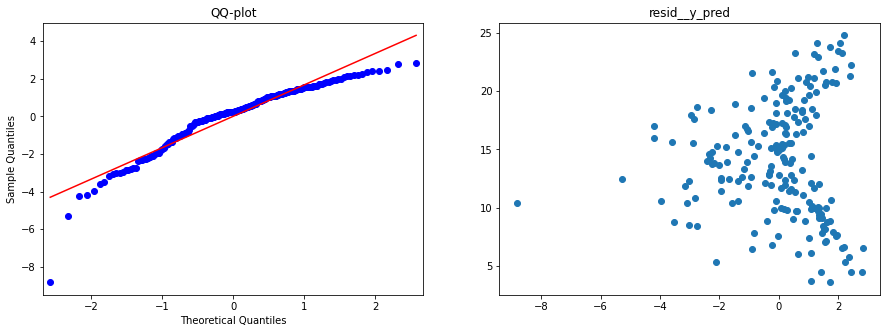

In [6]:
#Artık Grafikleri
import matplotlib.pyplot as plt

fig, (ax, ax2) = plt.subplots(ncols=2,figsize=(15, 5))

sm.qqplot(residuals, line = "s", ax = ax)
ax.set_title("QQ-plot")

plt.scatter(residuals, y_predicted)
ax2.set_title("resid__y_pred")


plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals versus Order')

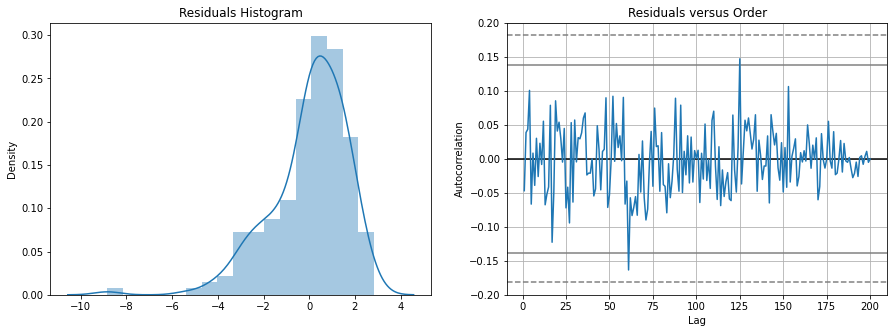

In [7]:
import seaborn as sns
fig, (ax, ax2) = plt.subplots(ncols=2,figsize=(15, 5))
sns.distplot(residuals, ax = ax) 
ax.set_title('Residuals Histogram')

pd.plotting.autocorrelation_plot(residuals, ax=ax2)
ax2.set_title('Residuals versus Order')



# Standardized Residuals

In [11]:
from statsmodels.tools.eval_measures import rmse

standardized_residuals = residuals / rmse(y, y_predicted)
standardized_residuals[0:5]


0    0.944537
1   -1.161386
2   -1.802544
3    0.540685
4   -0.173006
dtype: float64

# Studentized Residuals

In [9]:
#create instance of influence
influence = model.get_influence()
studentized_residuals = influence.resid_studentized_internal
studentized_residuals[0:5]


array([0.947054, -1.161042, -1.820490, 0.539752, -0.173316])

# R-Studentized Residuals

In [10]:
#studentized residuals
R_student_residuals = influence.resid_studentized_external
studentized_residuals[0:5]

array([0.947054, -1.161042, -1.820490, 0.539752, -0.173316])

# PRESS Artıklar


In [12]:
press_residuals = influence.resid_press
press_residuals[0:5]


array([1.616773, -1.976230, -3.130467, 0.917408, -0.295622])